In [12]:
import warnings
warnings.filterwarnings('ignore')


In [1]:
from pyforest import *


In [2]:
data = pd.read_csv("data\customer_booking.csv",encoding='ISO-8859-1')
data.head()

<IPython.core.display.Javascript object>

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
# null values
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
data["booking_complete"].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [5]:
data["num_passengers"].value_counts()

num_passengers
1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: count, dtype: int64

In [6]:
data["trip_type"].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [7]:
data["booking_origin"].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [10]:
data["sales_channel"].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

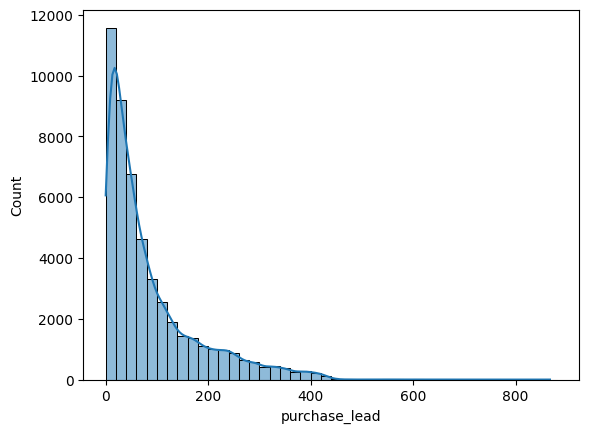

In [13]:
sns.histplot(data=data,x='purchase_lead',binwidth=20,kde=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

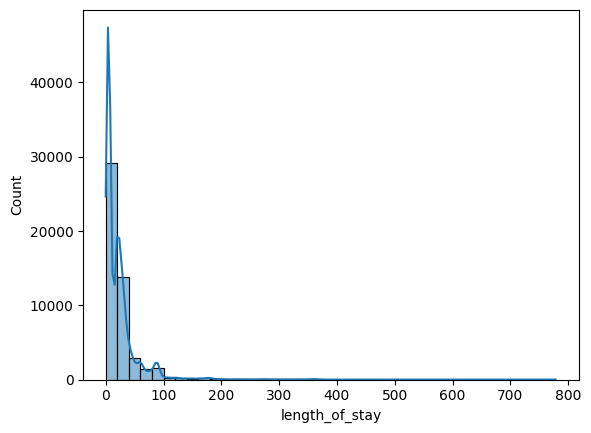

In [14]:
sns.histplot(data=data,x='length_of_stay',binwidth=20,kde=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='flight_day', ylabel='Count'>

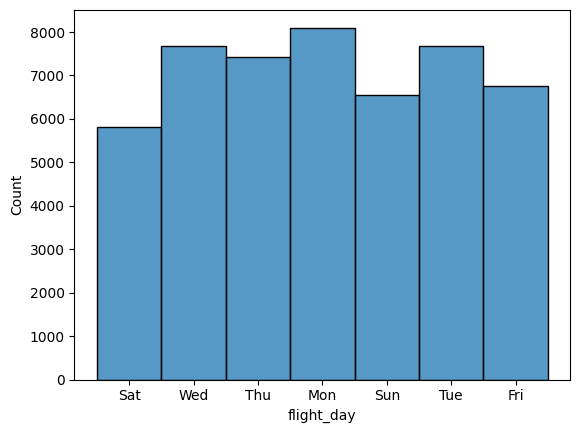

In [15]:
sns.histplot(data=data,x='flight_day',binwidth=20,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

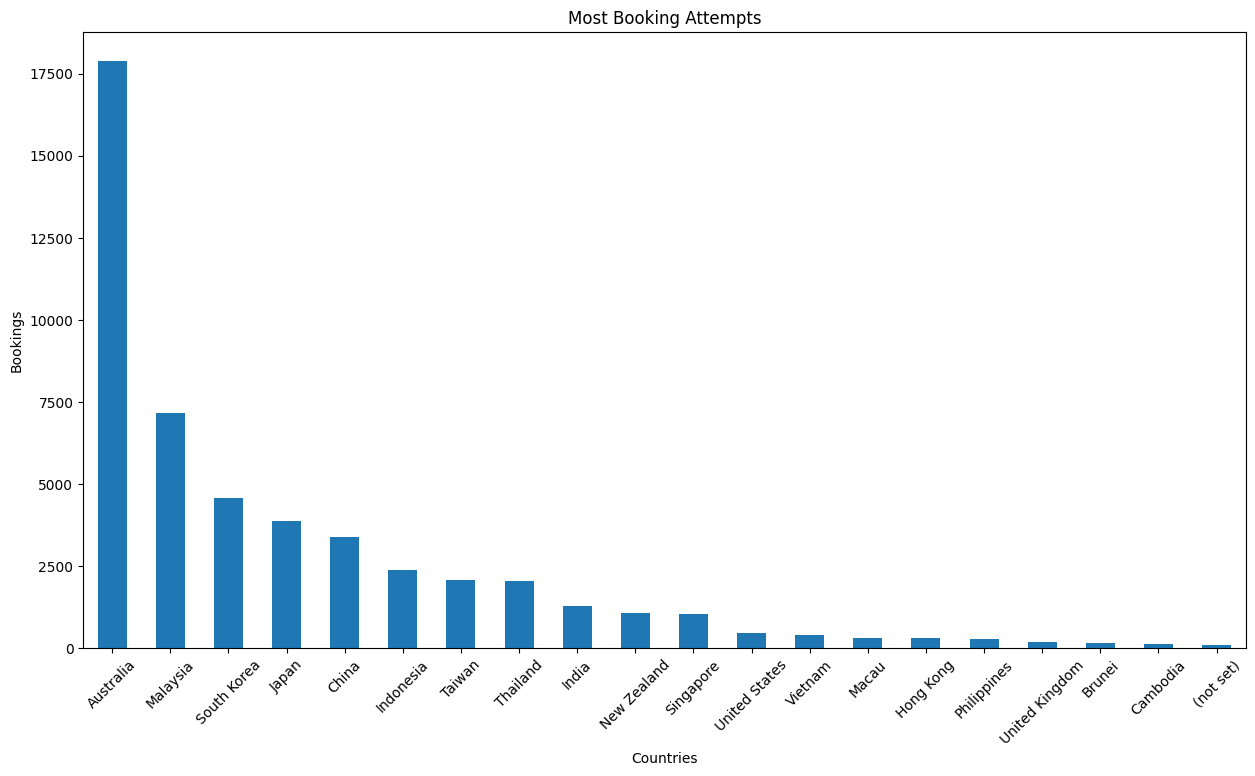

In [20]:
#booking origin
plt.figure(figsize=(15,8))
ax = data.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Bookings")
ax.set_title("Most Booking Attempts")
plt.xticks(rotation=45);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

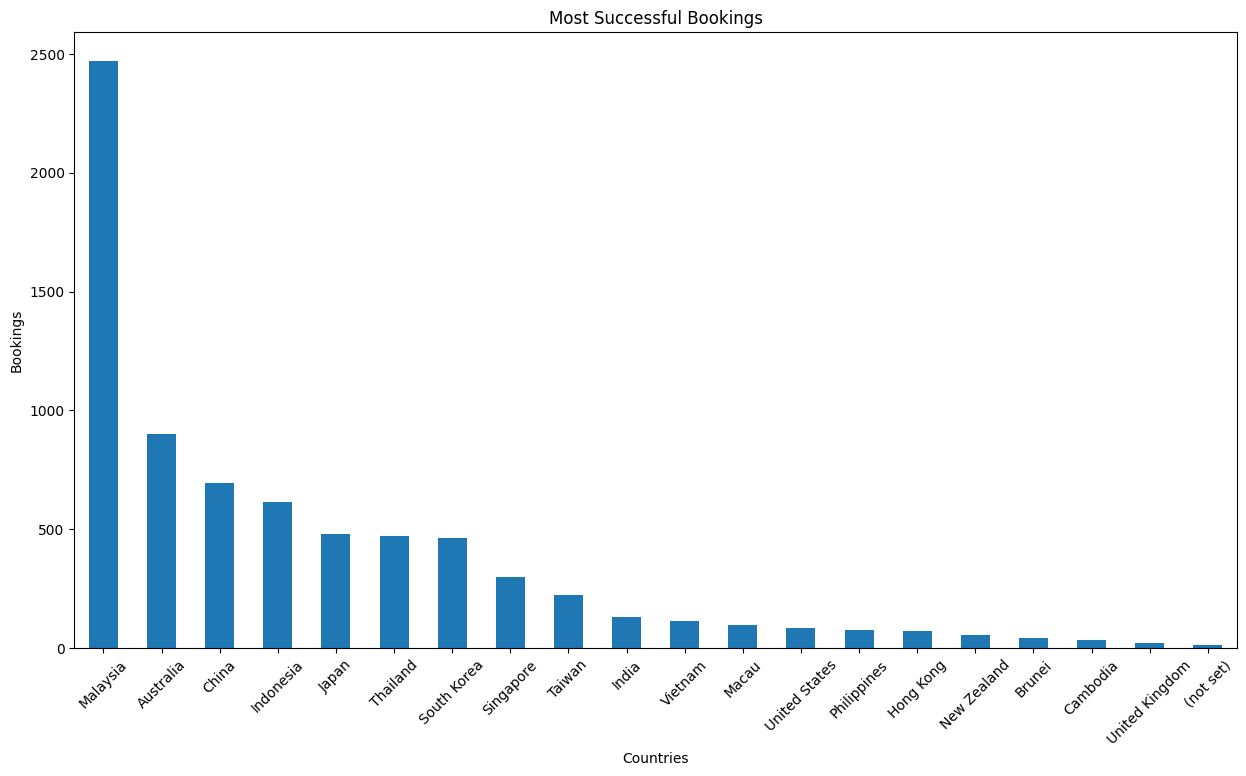

In [22]:
#booking origin
plt.figure(figsize=(15,8))
ax = data[data.booking_complete == 1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Bookings")
ax.set_title("Most Successful Bookings")
plt.xticks(rotation=45);

In [23]:
book_percentage = data[data.booking_complete == 1].shape[0]/data.shape[0] * 100
book_percentage

14.956